# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [29]:
from agents.agent import Agent
import numpy as np
from task import Task
import tensorflow as tf
import json
import sys

def train(agent, task):
    summary = list()

    for episodeId in range(40000):
        episodeReward = 0.0
        state = task.reset()

        stepCount = 0
        while True:
            stepCount += 1
            action = agent.act(state)
            nextState, reward, done = task.step(action[0])
            agent.learn(nextState=nextState, reward=reward, done=done)
            state = nextState
            episodeReward += reward
            if done:
                break

        print("\rEpisode: {} Reward: {:4.3f}".format(episodeId, episodeReward), end="")

        summary.append({
            "episodeId": episodeId,
            "reward": episodeReward,
        })

    print("\nDumping summary ...")
    with open("summary.json", "w") as summaryFile:
        json.dump(summary, summaryFile, indent=True)

task = Task()

agent = Agent(
    stateDim=task.state_size,
    actionDim=task.action_size,
    actionBound=[task.action_low, task.action_high],
    actorLearningRate=0.0001,
    criticLearningRate=0.001,
    batchSize=64,
    tau=0.01,
    gamma=0.99,
    bufferSize=1000000,
    seed=1234)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    agent.set_session(session)
    train(agent, task)


/usr/lib64/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Episode: 39999 Reward: -17.2143
Dumping summary ...


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Final average reward: -17.975


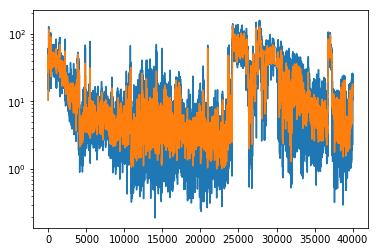

In [38]:
from collections import deque
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def average_reward(rewards):
    rewardQueue = deque(maxlen=10)
    for reward in rewards:
        rewardQueue.append(reward)
        yield np.mean(rewardQueue)

with open("summary.json", "r") as summaryFile:
    summary = json.load(summaryFile)
    episodeId = [episode["episodeId"] for episode in summary]
    reward = [episode["reward"] for episode in summary]
    averageReward = list(average_reward(reward))
    plt.semilogy(episodeId, np.abs(reward))
    plt.semilogy(episodeId, np.abs(averageReward))
    print("Final average reward: {:.3f}".format(averageReward[-1]))

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task, that I've chosen, is hovering in the same (initial) position without changing the orientation, during 1 second of simulation time. I've tried different reward functions using the distance from the initial position, angular difference from the initial orientation, linear acceleration. Finally, I've set the reward function to:

`-np.sqrt(np.mean([d_x, d_y, d_z, d_roll, d_pitch]))`

where `d_x`, `d_y`, `d_z` are the distances from the current position to the initial position along the X, Y, Z axes, and `d_roll`, `d_pitch` are the angular differences between the current orientation and the initial orientation of the quadcopter. This reward function gives the higher negative reward (around zero), when the quadcopter is around the initial position and close to the initial orientation. And the reward function gives the lower negative reward, when the quadcopter is far from the initial position and far from the initial orientation.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I've tried the DDPG algorithm. First, I've tried to run the implementation of DDPG proposed by the project's guide. I played with different hyperparameters, but wasn't able to get it working. Later I found [this article](http://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html) decribing the DDPG algorithm. I've tried the accompanying [code](https://github.com/pemami4911/deep-rl/tree/master/ddpg) implementation of the algorithm on the OpenAI's Pendulum-v0 task. The algorithm achieved an acceptable performance in less than a hundred episodes. The original code was implemented using the tflearn framework. I've refactored it and made it Tensorflow only. Initially I tried to rewrite it on Keras, but turned out the Keras' backend implementation isn't flexible enough for this algorithm, that's why I switched to TF-only implementation.

I've kept the original values of hyperparameters proposed by the article's source code:
* gamma: 0.99
* minibatch size: 64
* tau: 0.001
* actor learning rate: 0.0001
* critic learning rate: 0.001

The algorithm implements actor and critic using separate neural networks. The actor's network has the following structure:
* fully-connected layer with 128 outputs and ReLU activation. Takes the environment state vector as an input.
* batch normalization layer
* fully-connected layer with 128 outputs and ReLU activation
* batch normalization layer
* fully-connected layer with number of outputs equal to the size of the environment action vector and tanh activation
* linear transformation layer that maps tanh to the actual range of action values

The critic's network has two input layers. Each of the input layers followed by a separate sets of layers. First set of layers:
* fully-connected layer with 128 outputs and ReLU activation. Takes the environment state vector as an input.
* batch normalization layer
* fully-connected layer with 128 outputs and linear activation
* batch normalization layer
The second set of layers:
* fully-connected layer with 128 outputs and linear activation. Takes the agent's action vector as an input
* batch normalization layer

The outputs of these two sets of layers then combined using the sum operator followed by the ReLU activation function and a fully-connected layer with linear activation and a single output, representing the value of an action taken by the agent.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

Reward value varies a lot between -100 and 0, that's why I wanted to plot it using a log scale. matplotlib doesn't support negative log scale, that's why I plot an absolute value of the reward. Since, the reward function cannot give a positive reward, it shouldn't be a problem.

It took several thousands episodes to learn an acceptable behavior. Compared to the pendulum task, where agent learnd behavior in less then a hundred episodes, this task can be considered as hard.

Based on the average reward, I'd say that the learning curve is gradual. We can see spikes of the average reward, corresponding to temporary unlearning. Those spikes could be resulted by the lag between the actor's and the critic's learning processes or by the noise applied to the actions generated by the actor. Also there's a moment after 20000 episodes, where the reward is low for couple thousands episodes, I think, that could be caused by overfitting, since the replay buffer is 1000000 records big and the lenght of an episode is 50, which means that after 20000 episodes the replay buffer starts to pop out the very early episodes, where the agent didn't perform well, making the neural networks to forget that bad experience. I think, it can be treated by making the replay buffer longer or by changing the replay buffer's pop out policy. For example, we can force the replay buffer to sustain the uniform distribution of rewards along all of the records.

The final average reward is around -18, which is very low. But, as we can see from the reward plot, the best average reward achieved by the agent is around -1, which correspondes to the value of 0.02 per step of the RMS error of the combined position and orientation of the quadcopter. If we stop the training earlier, based on the value of the average reward, or save checkpoints, whenever the reward gets higher, we can keep the best achieved behavior.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

I think, the hardest part of the project for me was the initial implementation of the algorithm. Gladly, I've found some implementation on Internet, that I could use as a reference point. I used the OpenAI's pendulum task for testing. That helps to keep the functionality while doing refactoring. Refactoring itself helped me to get a good understanding of the algorithm's implementation.

I used to print out the position and the orientation of the quadcopter after each step of the training. During the early episodes of training, the quadcopter tended always to fall down, then there were several episodes, where the quadcopter always flyed up high, then several episodes, where it flied to the side. Looks like that's how the agent learns the Q-function.

I've started with the pendulum task. Then tried the hovering task with two steps episodes. After that continued with 10 steps episodes. And finally used 1 seconds episodes (50 steps). Gradual increasing of complexity helped me to understand the relation between complexity and convergance. The longer tasks or more complex tasks converge slower. I guess, that the longer and more complex tasks require the hierarchical approach for better convergance.

I think, that the performance of the agent can be improved by using the [Hierarchical Actor-Critic](https://arxiv.org/abs/1712.00948) algorithm.